In [1]:
import ROOT as r
import numpy as np

import pickle
from pathlib import Path

Welcome to JupyROOT 6.24/07


In [30]:
def plot_eff(filename):
    if "pickle" not in filename:
        raise Exception("Only pickle files can be used!")
    
    if Path(filename).is_file():
        with open(filename, "rb") as f:
            tablica = pickle.load(f)

        key_list = list(tablica.keys()) #M3 i M2 su stringovi u dictu pa ih treba pretvoriti u int

        M3_list = []
        M2_list = []

        for i in key_list:
            temp = i.split(",")
            temp_m3 = int(temp[0])
            temp_m2 = int(temp[1])

            M3_list.append(temp_m3)
            M2_list.append(temp_m2)

        efikasnosti_lista = list(tablica.values())

        M2_cut = []
        M3_cut = []
        efikasnosti_cut = []
        
        m2 = [260,300,700,1100,1500, 1900, 2300, 2700]

        for i in range(1, len(M2_list)): #treba odrezati nezeljene vrijednosti
            if M2_list[i] in m2:
                M2_cut.append(M2_list[i])
                M3_cut.append(M3_list[i])
                efikasnosti_cut.append(efikasnosti_lista[i])

        return M2_cut, M3_cut, efikasnosti_cut
    
    else:
        raise Exception(f"{filename} not found")

In [37]:
filename = "Signal_efficiency.pickle"
M2_list, M3_list, eff_list = plot_eff(filename)
#M2_list

In [32]:
#Root requires the list of bin edges to be converted to a numpy array

xBinEdges = np.array([800,1200,1600,2000,2400,2800,3200,4000],dtype='float64')
yBinEdges = np.array([260,300,700,1100,1500, 1900, 2300, 2700],dtype='float64')

#arguments are: name, title, number of x bins, bin edges in x, number of y bins, bin edges in y
h2 = r.TH2F("effMap","",len(xBinEdges)-1,xBinEdges,len(yBinEdges)-1,yBinEdges)

#Example on how to fill histogram
#Need to fill like this for every signal mass point
for i in range(0, len(eff_list)):
    mx = M3_list[i]
    my = M2_list[i]

    eff = eff_list[i]

    #print(my, mx, eff)

    h2.Fill(mx, my, eff)
    

Warning in <TROOT::Append>: Replacing existing TH1: effMap (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file Eff_plot.png has been created


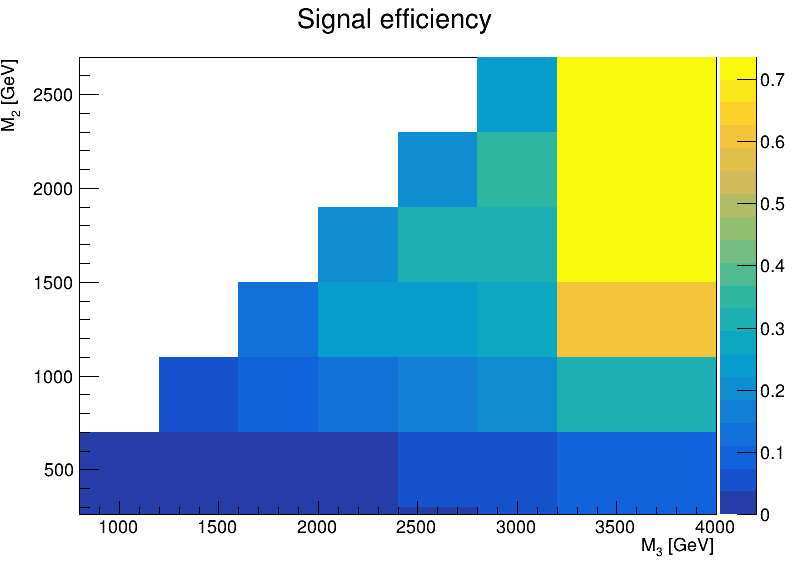

In [39]:
r.gStyle.SetOptStat(0000)
c = r.TCanvas("c","",800,600)
h2.GetXaxis().SetTitle("M_{3} [GeV]")
h2.GetYaxis().SetTitle("M_{2} [GeV]")
h2.SetTitle("Signal efficiency")
h2.Draw("colz")
c.Draw()
c.SaveAs("Eff_plot.png")